# Factuality Evaluator

Evaluates news articles on 6 factuality factors using the **factuality** pipeline (Google ADK + Gemini). Each factor is scored 0–10 (lower = more reliable).

**Requirements**: `google-adk`, `GOOGLE_API_KEY` or `GEMINI_API_KEY` in `.env`

## Setup

In [1]:
import os
import sys
import asyncio
from dotenv import load_dotenv
import pandas as pd
import json

project_root = os.getcwd()
sys.path.insert(0, project_root)
load_dotenv(os.path.join(project_root, ".env"))

from factuality import run, app, FACTUALITY_FACTORS

print(f"Project root: {project_root}")
print("✓ Imports successful (factuality / Google ADK + Gemini)")

Project root: /Users/jasxnhuynh/Desktop/Capstone-A1
✓ Imports successful
✓ Using Google ADK (ParallelAgent, Runner)


## Initialize Evaluator

In [2]:
api_key = os.environ.get("GOOGLE_API_KEY") or os.environ.get("GEMINI_API_KEY")
if api_key:
    print(f"✓ Google/Gemini API key loaded: {api_key[:15]}...")
else:
    print("⚠ Warning: No API key found. Set GOOGLE_API_KEY or GEMINI_API_KEY in .env file")

print(f"\n✓ App: {app.name}")
print(f"  Factuality factors:")
for name, key, output_key in FACTUALITY_FACTORS:
    print(f"    - {name}")

✓ Google/Gemini API key loaded: AIzaSyBtgYzFc-H...

✓ Evaluator initialized (Google ADK)
  Model: gemini-2.0-flash-lite
  Parallel agents: 6
  Factuality factors:
    - Political Affiliation Bias
    - Clickbait Level
    - Sensationalism
    - Title-Body Alignment
    - Sentiment Bias
    - Toxicity Level


## Test 1: Evaluate a Sample Article

In [3]:
article_title = "Trump’s nominee for whistleblower office is withdrawn after reports of racist texts"

article_content = """
Paul Ingrassia is no longer the nominee to lead the Office of Special Counsel, two White House officials told CNN on Tuesday, after his chances of getting through the Senate confirmation imploded following reports of racist text messages that he allegedly sent to a group chat.

Ingrassia posted earlier Tuesday evening that he was withdrawing himself from his confirmation hearing “because unfortunately I do not have enough Republican votes at this time.” He added that he appreciated the “overwhelming support” he received and that he “will continue to serve President Trump and this administration to Make America Great Again!”

His post came hours after Senate Majority Leader John Thune hinted that the White House would pull Ingrassia’s nomination following the reports of racist text messages. “I think they’ll have something official to say about that, but you know what we’ve said, and you’ll probably be hearing from them soon,” he told reporters at the White House.

Earlier Tuesday, a White House official told CNN his nomination was “under review.”


Thune said Monday night that he hoped the White House would pull the nomination after Politico’s reporting on the messages. “He’s not going to pass,” Thune added of Ingrassia, whom Trump nominated in May to lead the independent agency tasked with protecting federal whistleblowers and enforcing civil service laws.

Ingrassia was set to appear before the Senate Homeland Security Committee on Thursday for his confirmation hearing, but one Republican senator on the panel had already announced he’d vote against advancing the nomination.

“No, I do not support him,” Sen. Rick Scott of Florida said Monday night. Scott’s opposition would have effectively sunk the nomination in committee, assuming every Democrat joined him.

On Tuesday, after Politico’s report, CNN’s KFile reported that Ingrassia lost the support of the main Jewish group backing his nomination


Ingrassia, whose nomination had already drawn scrutiny, allegedly texted a group chat of other Republicans saying he has “a Nazi streak” and that the Rev. Martin Luther King Jr. holiday should be “tossed into the seventh circle of hell,” according to Politico, which viewed the group chat.

Ingrassia’s lawyer, Edward Andrew Paltzik, initially questioned the authenticity of the messages but added that if authentic, they were meant satirically.

“Looks like these texts could be manipulated or are being provided with material context omitted. However, arguendo, even if the texts are authentic, they clearly read as self-deprecating and satirical humor making fun of the fact that liberals outlandishly and routinely call MAGA supporters ‘Nazis,’” he wrote in a statement to Politico.

“In reality, Mr. Ingrassia has incredible support from the Jewish community because Jews know that Mr. Ingrassia is the furthest thing from a Nazi,” Paltzik added. In a subsequent statement to Politico, he said, “there are who cloak themselves in anonymity while executing their underhanded personal agendas to harm Mr. Ingrassia at all costs,” and that “we do not concede the authenticity of any of these purported messages.”


KFile has previously reported on Ingrassia’s history of racist invective and conspiratorial rants, and affinity for a well-known White nationalist and Holocaust denier. His nomination had drawn scrutiny over his past promotion of conspiracy theories and tweets from his podcast that included calls for martial law following Trump’s 2020 election loss and harsh anti-Israel rhetoric aimed at the GOP. Ingrassia also argued publicly that “straight White men” are the most intelligent demographic group and should be prioritized in education.

Amid KFile’s initial reporting in July, the Trump administration insisted that Ingrassia had the backing of “many Jewish groups,” listing four — but most of those groups told CNN in July that they do not support him.

On Tuesday, Morton Klein — president of the main Jewish group that had been backing Ingrassia’s nomination, Zionist Organization of America — told CNN in a statement, “If these text revelations are accurate, I have no choice but to immediately withdraw my support. In this time of a surge and growing antisemitism, it is incumbent upon all of us to fight even any hint of antisemitism or racism.”

Ingrassia, who was admitted to the bar only last summer, held a brief White House internship during Trump’s first term. This year, Ingrassia first worked as a White House liaison at the Justice Department before reportedly being pushed out and reassigned to the Department of Homeland Security.


He would have marked a sharp departure from previous heads of the OSC, a role designed to be politically independent and to protect whistleblowers from retaliation. Rather than a long record of managerial or prosecutorial experience, typical of those who previously held the job, Ingrassia brought a fervent loyalty to Trump and a lengthy record of inflammatory statements.

"
"""

article_url = "https://www.cnn.com/2025/10/21/politics/paul-ingrassia-withdraw-hearing"

print(f"Article Title: {article_title}")
print(f"Content Length: {len(article_content)} characters")
print(f"\nContent Preview:\n{article_content[:200]}...")

Article Title: Trump’s nominee for whistleblower office is withdrawn after reports of racist texts
Content Length: 4980 characters

Content Preview:

Paul Ingrassia is no longer the nominee to lead the Office of Special Counsel, two White House officials told CNN on Tuesday, after his chances of getting through the Senate confirmation imploded fol...


In [4]:
print("Running factuality pipeline (ParallelAgent → Combiner)...")
print("This may take 1-2 minutes.\n")

result = asyncio.run(run(
    article_title=article_title,
    article_content=article_content,
    article_url=article_url,
    predictive_scores=None,
))

print("✓ Evaluation completed!")
fs = result.get("factor_scores", {})
valid = sum(1 for s in fs.values() if s is not None)
print(f"   Got {valid}/{len(fs)} factor scores")

Running Google ADK evaluation (ParallelAgent, 6 factors)...
This may take 1-2 minutes.

✓ Evaluation completed!
   Got 6/6 factor scores


## Display Results

In [5]:
if "error" in result:
    print(f"Error: {result['error']}")
    if "quota" in result['error'].lower() or "429" in result['error']:
        print("\n⚠ Quota limit reached. Please wait a few minutes and try again.")
else:
    combined_score = result.get('combined_veracity_score', 0)
    print(f"Combined Veracity Score: {combined_score:.2f}/10")
    print(f"   (Lower score = more reliable/factual)\n")

    print("="*80)
    print("FACTOR SCORES:")
    print("="*80)
    factor_scores = result.get('factor_scores', {})
    if not factor_scores:
        print("   No factor scores returned.")
        print("   Tip: Restart the kernel (Kernel → Restart) and run all cells.")
        print("   Check that GOOGLE_API_KEY or GEMINI_API_KEY is set in .env")
    else:
        for factor, score in factor_scores.items():
            if score is not None:
                print(f"   {factor.replace('_', ' ').title():<35} {score:>5.2f}/10")
            else:
                err_msg = result.get("explanations", {}).get(factor, "Failed")[:60]
                print(f"   {factor.replace('_', ' ').title():<35} Error ({err_msg}...)")

Combined Veracity Score: 4.00/10
   (Lower score = more reliable/factual)

FACTOR SCORES:
   Political Affiliation Bias           7.00/10
   Clickbait Level                      2.00/10
   Sensationalism                       2.00/10
   Title Body Alignment                 0.00/10
   Sentiment Bias                       6.00/10
   Toxicity Level                       7.00/10


In [6]:
if "error" not in result:
    print("\n" + "="*80)
    print("DETAILED EXPLANATIONS:")
    print("="*80)
    explanations = result.get('explanations', {})
    if not explanations:
        print("   No explanations returned.")
        print("   Re-run the evaluation cell (Cell 6) and try again.")
    else:
        for factor, explanation in explanations.items():
            expl = explanation if isinstance(explanation, str) else str(explanation)
            print(f"\n{factor.replace('_', ' ').title()}:")
            print(f"   {expl}")


DETAILED EXPLANATIONS:

Political Affiliation Bias:
   This article demonstrates a moderate to strong bias due to its framing and loaded language, despite presenting some facts. The article focuses on the withdrawal of Paul Ingrassia's nomination for a government position following reports of racist text messages. The language used, such as describing the messages as "racist" and highlighting Ingrassia's "racist invective and conspiratorial rants," suggests a negative portrayal. The article emphasizes Ingrassia's "fervent loyalty to Trump," which is presented as a negative trait in the context of the role he was nominated for. While the article includes statements from Ingrassia's lawyer and mentions his defense, it primarily focuses on the negative aspects of Ingrassia's background and the opposition to his nomination. The headline, "Trump’s nominee for whistleblower office is withdrawn after reports of racist texts," sets a negative tone from the start. The article does not present 

In [7]:
if "error" not in result:
    print("\n" + "="*80)
    print("OVERALL ASSESSMENT:")
    print("="*80)
    print(result.get('overall_assessment', 'N/A'))


OVERALL ASSESSMENT:
Based on the evaluation of 6 factuality factors, 
this article is assessed as mostly reliable with minor concerns (average score: 4.00/10). 
The evaluation considered political affiliation bias, clickbait level, sensationalism, 
title-body alignment, sentiment bias, and toxicity level.


## Visualize Results

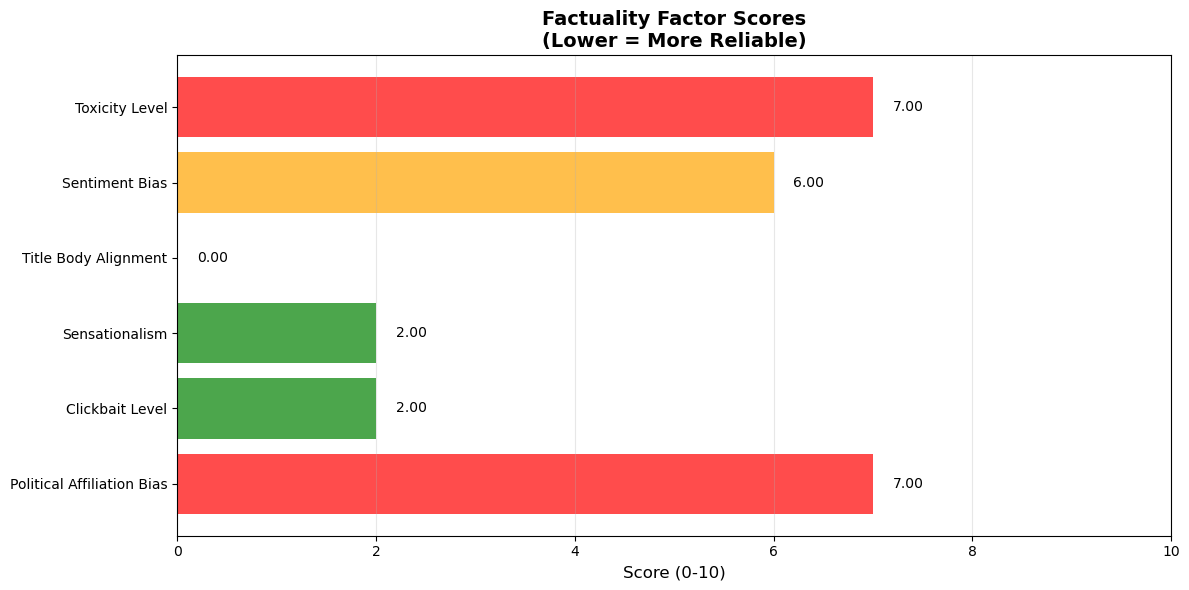


Combined Veracity Score: 4.00/10


In [8]:
import matplotlib.pyplot as plt
import numpy as np

if "error" not in result:
    factor_scores = result.get('factor_scores', {})
    factors = []
    scores = []
    for factor, score in factor_scores.items():
        if score is not None:
            factors.append(factor.replace('_', ' ').title())
            scores.append(score)

    if factors and scores:
        plt.figure(figsize=(12, 6))
        colors = ['red' if s >= 7 else 'orange' if s >= 5 else 'green' for s in scores]
        bars = plt.barh(factors, scores, color=colors, alpha=0.7)
        
        plt.xlabel('Score (0-10)', fontsize=12)
        plt.title('Factuality Factor Scores\n(Lower = More Reliable)', fontsize=14, fontweight='bold')
        plt.xlim(0, 10)
        plt.grid(axis='x', alpha=0.3)
        for i, (bar, score) in enumerate(zip(bars, scores)):
            plt.text(score + 0.2, i, f'{score:.2f}', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No scores to visualize. Re-run the evaluation cell.")
    
    combined = result.get('combined_veracity_score', 0)
    print(f"\nCombined Veracity Score: {combined:.2f}/10")

## Test 2: Evaluate Your Own Article

In [9]:
my_article_title = "Your Article Title Here"
my_article_content = """
Paste your article content here.
This can be multiple paragraphs.
"""
my_article_url = "https://example.com/article"

print(f"Title: {my_article_title}")
print(f"Content Length: {len(my_article_content)} characters")

Title: Your Article Title Here
Content Length: 67 characters


In [10]:
my_result = asyncio.run(run(
    article_title=my_article_title,
    article_content=my_article_content,
    article_url=my_article_url,
    predictive_scores=None,
))

if my_result.get("combined_veracity_score") is not None:
    print(f"Combined Score: {my_result.get('combined_veracity_score', 0):.2f}/10")
    print("\nFactor Scores:")
    for factor, score in my_result.get('factor_scores', {}).items():
        if score is not None:
            print(f"  {factor.replace('_', ' ').title()}: {score:.2f}/10")
else:
    print("No combined score in result.")

Combined Score: 1.67/10

Factor Scores:
  Political Affiliation Bias: 0.00/10
  Sensationalism: 0.00/10
  Toxicity Level: 0.00/10
  Sentiment Bias: 0.00/10
  Title Body Alignment: 10.00/10
  Clickbait Level: 0.00/10


## Export Results

In [11]:
if "error" not in result:
    output_file = "evaluation_results.json"
    with open(output_file, 'w') as f:
        json.dump(result, f, indent=2)
    print(f"✓ Results saved to {output_file}")
    print("\nFormatted Results:")
    print(json.dumps(result, indent=2))

✓ Results saved to evaluation_results.json

Formatted Results:
{
  "combined_veracity_score": 1.5,
  "factor_scores": {
    "clickbait_level": 1,
    "title_body_alignment": 0,
    "sentiment_bias": 2,
    "sensationalism": 1,
    "toxicity_level": 0,
    "political_affiliation_bias": 5
  },
  "explanations": {
    "clickbait_level": "The headline 'Trump\u2019s nominee for whistleblower office is withdrawn after reports of racist texts' is factual, concise, and accurately reflects the article's content without sensational language like 'shocking' or 'unbelievable.' It contains no excessive punctuation for emotional manipulation (no exclamation marks or misleading question marks) and does not withhold critical information\u2014the withdrawal is directly tied to the racist text reports as confirmed in the article. The title prioritizes informing readers about a newsworthy political development rather than maximizing clicks through exaggeration or false urgency. While the topic itself is 

## Notes

- **Requirements**: `GOOGLE_API_KEY` or `GEMINI_API_KEY` in `.env`
- **API Quota**: If you see `429 RESOURCE_EXHAUSTED` errors, wait ~60 seconds and retry
- **Lower Scores = Better**: Scores are inverted — lower means more reliable/factual